In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
data1 = pd.read_excel("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/canopy height.xlsx")
data1

,Day,Date,CH
0,0 2020,2020-03-26,0.0000
1,13,2020-04-07,-0.0073
2,25,2020-04-19,0.0640
3,35,2020-04-29,0.1150
4,41,2020-05-05,0.1420
5,49,2020-05-13,0.1760
6,55,2020-05-19,0.3700
7,62,2020-05-26,0.4320
8,69,2020-06-02,0.4960
9,77,2020-06-10,0.6600


In [4]:
data1 = data1.iloc[0:15]

In [5]:
data2 = data1.drop(['Day'], axis=1)
data2

,Date,CH
0,2020-03-26,0.0000
1,2020-04-07,-0.0073
2,2020-04-19,0.0640
3,2020-04-29,0.1150
4,2020-05-05,0.1420
5,2020-05-13,0.1760
6,2020-05-19,0.3700
7,2020-05-26,0.4320
8,2020-06-02,0.4960
9,2020-06-10,0.6600


In [6]:
data0 = data2.copy()
data0['Date'] = pd.to_datetime(data0['Date'])
data0.index = data0['Date']
del data0['Date']

In [7]:
df_interpol = data0.resample('D').mean()
df_interpol['CH'] = df_interpol['CH'].interpolate()
df_interpol

,CH
Date,
2020-03-26,0.000000
2020-03-27,-0.000608
2020-03-28,-0.001217
2020-03-29,-0.001825
2020-03-30,-0.002433
...,...
2020-07-15,0.850000
2020-07-16,0.850000
2020-07-17,0.850000


In [8]:
df_interpol.to_csv('CH_2020.csv')

In [9]:
f2 = pd.read_csv("C:/Users/samba/OneDrive/Desktop/TAMU CORPUS/Driscoll/sarima/datasets/CH_2020.csv")

In [10]:
f2['Date'] = pd.to_datetime(f2['Date'])

In [11]:
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.api import ExponentialSmoothing

In [12]:
f2

,Date,CH
0,2020-03-26,0.000000
1,2020-03-27,-0.000608
2,2020-03-28,-0.001217
3,2020-03-29,-0.001825
4,2020-03-30,-0.002433
...,...,...
111,2020-07-15,0.850000
112,2020-07-16,0.850000
113,2020-07-17,0.850000
114,2020-07-18,0.850000


In [13]:
data2 = f2.copy()

In [14]:
data2['Date'] = pd.to_datetime(data2['Date'])
data2.index = data2['Date']

In [15]:
data2.drop(['Date'], axis = 1,inplace = True)

In [16]:
min(data2['CH'])

-0.0073

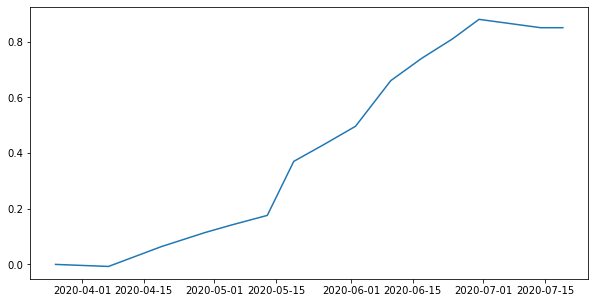

In [17]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,5
plt.plot(data2['CH'])

In [18]:
max(data2['CH'])

0.88

In [19]:
ad_fuller_result = adfuller(data2['CH'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -1.1505496698383422
p-value: 0.6944983938235227


In [20]:
data2['CH'] = np.log(data2['CH'])
data2['CH_log_diff'] = data2['CH'] - data2['CH'].shift(1)
data2 = data2.dropna()
ad_fuller_result = adfuller(data2['CH_log_diff'])
print(f'ADF Statistic: {ad_fuller_result[0]}')
print(f'p-value: {ad_fuller_result[1]}')

ADF Statistic: -19.08012780453766
p-value: 0.0


C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


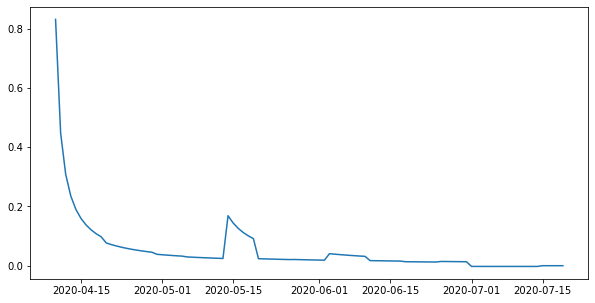

In [21]:
plt.plot(data2['CH_log_diff'])

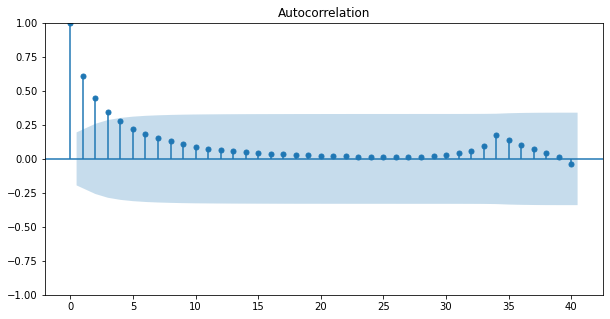

In [22]:
sm.graphics.tsa.plot_acf(data2['CH_log_diff'].values.squeeze(), lags=40)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


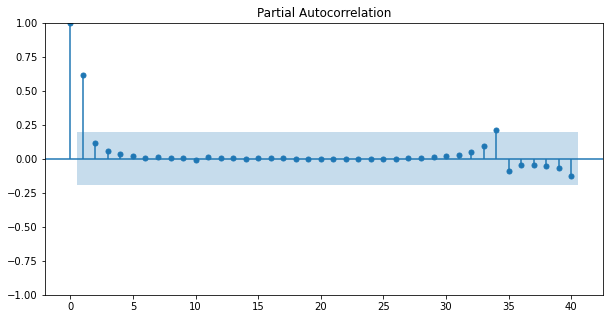

In [23]:
sm.graphics.tsa.plot_pacf(data2['CH_log_diff'].values.squeeze(), lags=40)
plt.show()

In [ ]:
# p = 1, q = 0, D = 1

In [24]:
train_data = data2[:50]
train_data_1 = train_data['CH']
train_data_1

Date
2020-04-10   -4.554002
2020-04-11   -4.106417
2020-04-12   -3.798322
2020-04-13   -3.563128
2020-04-14   -3.372853
2020-04-15   -3.213059
2020-04-16   -3.075317
2020-04-17   -2.954270
2020-04-18   -2.846307
2020-04-19   -2.748872
2020-04-20   -2.672201
2020-04-21   -2.600991
2020-04-22   -2.534517
2020-04-23   -2.472188
2020-04-24   -2.413517
2020-04-25   -2.358098
2020-04-26   -2.305590
2020-04-27   -2.255702
2020-04-28   -2.208184
2020-04-29   -2.162823
2020-04-30   -2.124439
2020-05-01   -2.087474
2020-05-02   -2.051826
2020-05-03   -2.017406
2020-05-04   -1.984131
2020-05-05   -1.951928
2020-05-06   -1.922438
2020-05-07   -1.893792
2020-05-08   -1.865944
2020-05-09   -1.838851
2020-05-10   -1.812473
2020-05-11   -1.786772
2020-05-12   -1.761715
2020-05-13   -1.737271
2020-05-14   -1.568616
2020-05-15   -1.424342
2020-05-16   -1.298283
2020-05-17   -1.186351
2020-05-18   -1.085696
2020-05-19   -0.994252
2020-05-20   -0.970596
2020-05-21   -0.947487
2020-05-22   -0.924899
2020-0

In [25]:
test_data = data2[50:60]
test_data_1 = test_data['CH']
test_data_1

Date
2020-05-30   -0.758067
2020-05-31   -0.738742
2020-06-01   -0.719785
2020-06-02   -0.701179
2020-06-03   -0.660680
2020-06-04   -0.621757
2020-06-05   -0.584293
2020-06-06   -0.548181
2020-06-07   -0.513329
2020-06-08   -0.479650
Name: CH, dtype: float64

In [26]:
from math import sqrt
from multiprocessing import cpu_count
from joblib import Parallel
from joblib import delayed
from warnings import catch_warnings
from warnings import filterwarnings
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.arima.model import ARIMA
model = ARIMA(train_data_1, order = (1,1,0))
model_fit = model.fit()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [27]:
print (model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                     CH   No. Observations:                   50
Model:                 ARIMA(1, 1, 0)   Log Likelihood                  93.809
Date:                Wed, 03 Aug 2022   AIC                           -183.618
Time:                        15:03:50   BIC                           -179.834
Sample:                    04-10-2020   HQIC                          -182.182
                         - 05-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9921      0.009    116.388      0.000       0.975       1.009
sigma2         0.0012      0.000     11.517      0.000       0.001       0.001
Ljung-Box (L1) (Q):                   0.16   Jarque-

<AxesSubplot:xlabel='Date'>

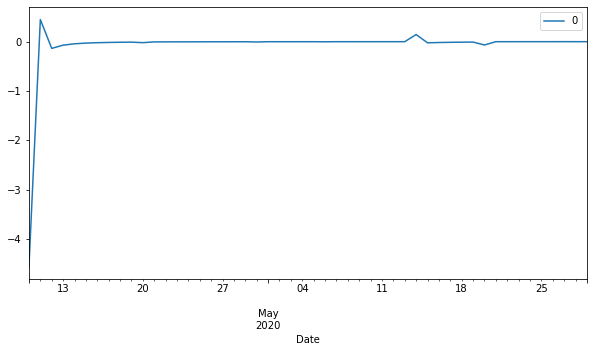

In [28]:
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)
residuals.plot()

<AxesSubplot:ylabel='Density'>

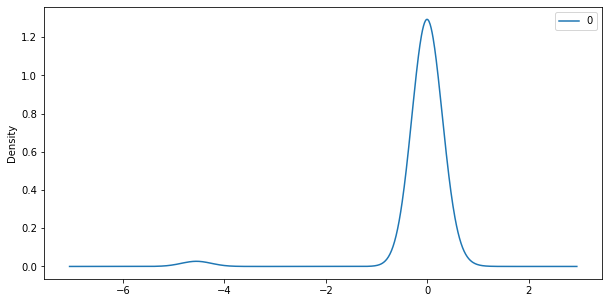

In [29]:
residuals.plot(kind='kde')

In [30]:
residuals.describe()

,0
count,50.000000
mean,-0.090083
std,0.648194
min,-4.554002
25%,-0.011691
50%,-0.002090
75%,-0.000448
max,0.447585


In [33]:
model_pred = model_fit.forecast(steps = 10)
model_pred_1 = np.exp(model_pred)

In [34]:
test_data_2 = np.exp(test_data_1)
test_data_2

Date
2020-05-30    0.468571
2020-05-31    0.477714
2020-06-01    0.486857
2020-06-02    0.496000
2020-06-03    0.516500
2020-06-04    0.537000
2020-06-05    0.557500
2020-06-06    0.578000
2020-06-07    0.598500
2020-06-08    0.619000
Name: CH, dtype: float64

In [35]:
model_pred_1

2020-05-30    0.468682
2020-05-31    0.478047
2020-06-01    0.487523
2020-06-02    0.497109
2020-06-03    0.506805
2020-06-04    0.516612
2020-06-05    0.526528
2020-06-06    0.536554
2020-06-07    0.546690
2020-06-08    0.556934
Freq: D, Name: predicted_mean, dtype: float64

In [36]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test_data_2, model_pred_1))
print('Test RMSE: %.3f' % rmse)

Test RMSE: 0.031
